# Previsão do preço de casas


Base de dados com o preço de casas de King County em Washington
Casas vendidas entre maio de 2014 e maio de 2015
Link: https://www.kaggle.com/harlfoxem/housesalesprediction

<img src=casas_entradas.png>

* Variáveis de entrada:
* * ida: índice da casa
* * date: data que a casa foi vendida
* * bedrooms: número de quartos
* * bathrooms: número de banheiros
* * sqft_living: metragem quadrada da casa
* * sqft_lot: metragem quadrada do lote
* * floors: número de andares
* * waterfront: beira-mar

* Variáveis de entrada:
* * condition: condição geral da casa
* * grade: nota que a casa recebeu, baseado no ranking da cidade de King County
* * sqft_abovesquare: footage of house apart from basement
* * sqft_basement: square footage of the basement
* * yr_built: ano de construção
* * yr_renovated: ano que a cada foi renovada
* * zipcode: CEP
* * lat: coordenada de latitude
* * long: coordenada de longitude
* * sqft_living15: metragem em 2015
* * sqft_lot15: metragem em 2015 (caso tenha passado por renovações)

<br>

* O modelo deve prever:
* * Preço da casa


<img src=casas_rna.png>

Base de dados: https://www.kaggle.com/harlfoxem/housesalesprediction

# Etapa 1: Importação das bibliotecas

In [18]:
# descomentar para google colab
# %tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
tf.__version__

'2.17.0'

# Etapa 2: Importação da base de dados

In [19]:
house_df = pd.read_csv('kc-house-data.csv', encoding = 'ISO-8859-1')

In [20]:
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [23]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Etapa 3: Visualização dos dados

In [24]:
house_df['date'] = pd.to_datetime(house_df['date'])

<Axes: >

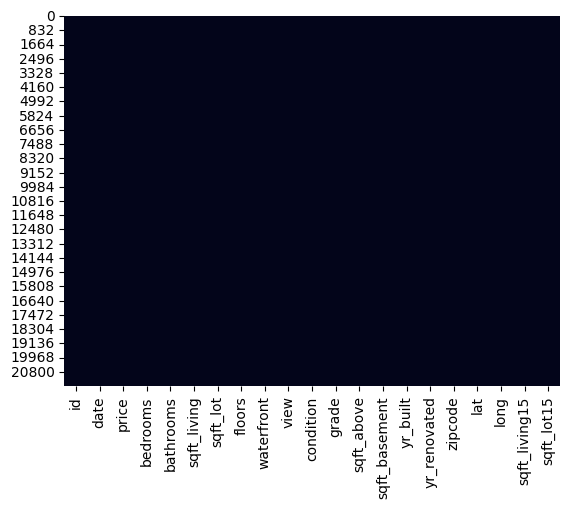

In [25]:
sns.heatmap(house_df.isnull(), cbar=False)

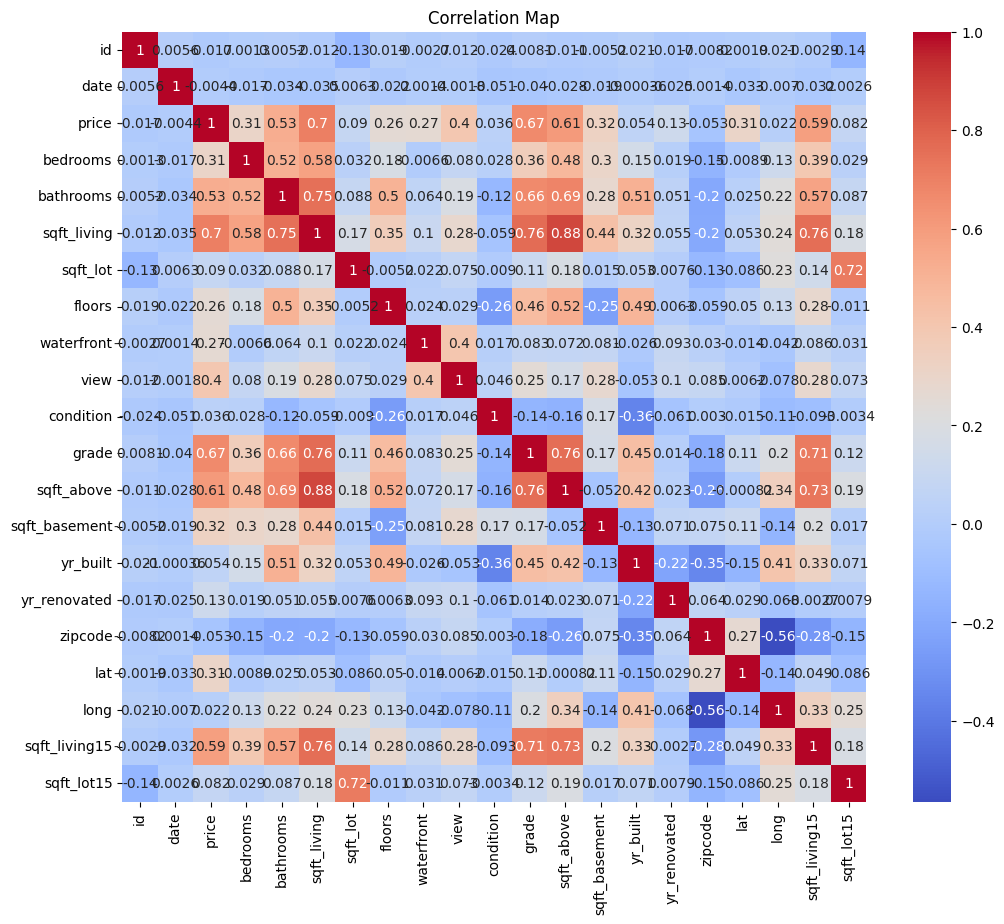

In [26]:
correlation_matrix = house_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

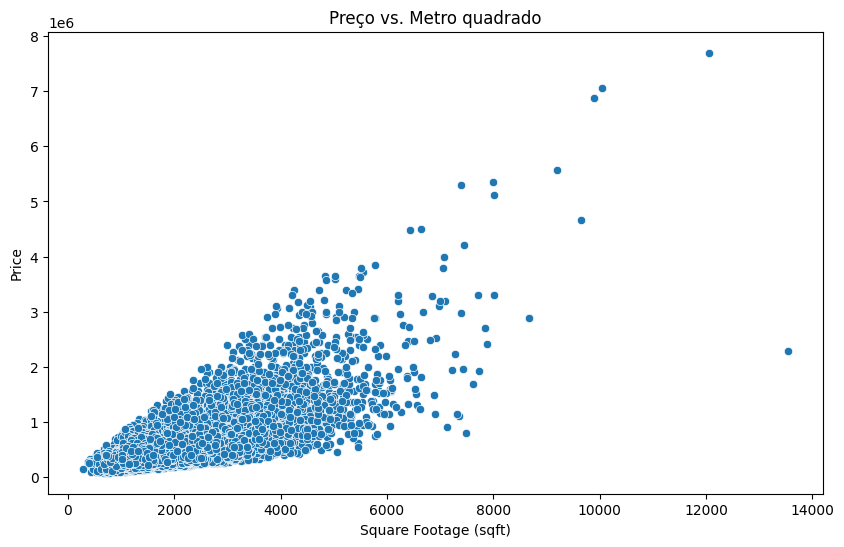

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=house_df)
plt.title('Preço vs. Metro quadrado')
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Price')
plt.show()

# Etapa 4: Tratamento da base de dados

In [28]:
house_df = house_df.drop(labels=['id'], axis = 1)

In [29]:
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
house_df['date'] = pd.to_datetime(house_df['date'])

In [31]:
house_df = house_df.drop(labels=['date'], axis = 1)

# Etapa 5: Construção e criação do modelo

In [32]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [33]:
features = house_df.columns.tolist()
features.remove('price')

X = house_df[features]
y = house_df['price']

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [35]:
X.shape

(21613, 18)

In [36]:
X

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [37]:
# criando modelo
model = Sequential()

# units indica 100 neurônios teremos na camada escondida
# input_shape indica entradas e definimos com 35 neurônios o que equivale ao número de entradas
model.add(tf.keras.layers.Dense(units = 100, activation='relu', input_shape=(X.shape[1],)))

# relu zero se for negativo e passar valor para frente se for positivo.
# Relu computacionalmente é eficiente por não usar cálculos complexos
# adicionando segunda camada escondidade com 100 neurônios
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

# adicionando terceira camada escondidade com 100 neurônios
model.add(tf.keras.layers.Dense(units=100, activation='relu'))

# adicionando a camada de saída que terá apenas um neurônio
# como estamos trabalhando com problema de regressão iremos usar função de ativação linear
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

In [39]:
epochs_hist = model.fit(X, y, epochs = 100, batch_size = 256)

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0222
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5186e-04
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4038e-04
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7729e-04
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.6096e-04
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0150e-04
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.9254e-04
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6737e-04
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8603e-04
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5603e-04
Epoch 11/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7842e-04
Epoch 12/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4891e-04
Epoch 13/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5287e-04
Epoch 14/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8204e-04
Epoch 15/100
85/85 

# Etapa 6: Avaliação do modelo

In [40]:
epochs_hist.history.keys()

dict_keys(['loss'])

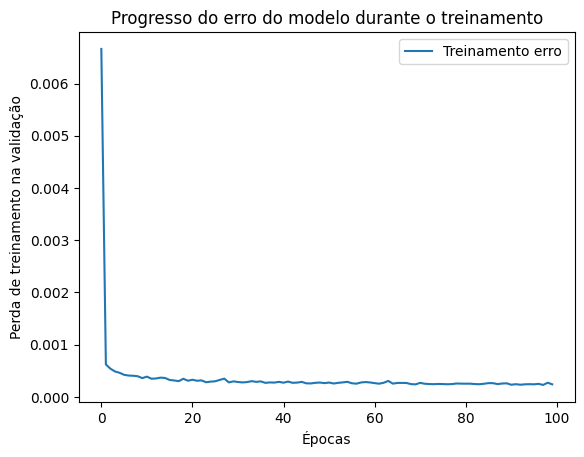

In [41]:
plt.plot(epochs_hist.history['loss'])
# plt.plot(epochs_hist.history['val_loss'])
plt.title('Progresso do erro do modelo durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda de treinamento na validação')
plt.legend(['Treinamento erro', 'Validação erro']);

# você avalia se deve treinar por mais épocas ou não

# Etapa 7: Aumento da quantidade de características

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [43]:
y_predict = model.predict(X)

676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [44]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y)

In [45]:
n = len(X)
n

21613

In [46]:
k = X.shape[1]
k

18

In [47]:
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mse = mean_squared_error(y_test_orig, y_predict_orig)
rmse = sqrt(mse)

# indica que 76% nas variações na saída foi capturado pelos parâmetros/atributos da entrada
r2 = r2_score(y_test_orig, y_predict_orig)

# r2_ajustado mais baixo signfica que várias das características que adicionamos não contribuem muito para o modelo
# é interessante tentar apagar variáveis que não sejam importantes
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [48]:
print("MAE: ", mae, "\nMSE: ", mse, "\nRMSE: ", rmse, "\nR2: ", r2, "\nADJ R2: ", adj_r2)

MAE:  71653.91670811549 
MSE:  12726691519.22848 
RMSE:  112812.63900480513 
R2:  0.9055716293026994 
ADJ R2:  0.9054929171292924
